# Анализ ДатаСета Звонки

In [9]:
import pandas as pd

# Замените 'your_file.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Выведите первые несколько строк данных, чтобы убедиться, что импорт выполнен успешно
df.head()


,Дата,Месяц,Неделя,День недели,Результат звонка,Юнит,Ожидание,Соединение с оператором,Длительность,Удержание,Количество удержаний,Оценки,Трансфер на
0,2023-06-01 20:07:39,Июнь,22,Четверг,Завершен клиентом,Плюс,5.0,4,311.0,58,1,0,NaN
1,2023-06-01 20:22:17,Июнь,22,Четверг,Завершен оператором,Плюс,6.0,4,624.0,137,1,5,NaN
2,2023-06-01 20:33:57,Июнь,22,Четверг,Завершен оператором,Плюс,6.0,5,66.0,0,0,5,NaN
3,2023-06-01 20:43:51,Июнь,22,Четверг,Завершен оператором,Плюс,3.0,2,676.0,306,2,0,NaN
4,2023-06-01 20:56:00,Июнь,22,Четверг,Неудачная попытка дозвона,Плюс,NaN,0,NaN,0,0,0,NaN


In [10]:
# Получите количество строк и столбцов
num_rows, num_columns = df.shape

# Выведите результат
print(f"Количество строк: {num_rows}")
print(f"Количество столбцов: {num_columns}")

Количество строк: 4050
Количество столбцов: 13


In [11]:
for column in df.columns:
    value_counts = df[column].value_counts()
    
    # Выведите результат
    print(f"Столбец: {column}")
    print(value_counts)
    print("\n")

Столбец: Дата
Дата
2023-10-12 22:30:26    5
2023-11-06 01:23:42    5
2023-11-23 00:30:44    5
2023-11-10 22:47:39    4
2023-11-12 05:27:05    4
                      ..
2023-08-06 03:27:01    1
2023-08-06 03:45:41    1
2023-08-06 04:12:03    1
2023-08-06 04:41:41    1
2023-11-25 06:47:08    1
Name: count, Length: 3915, dtype: int64


Столбец: Месяц
Месяц
Октябрь     821
Ноябрь      808
Июль        674
Сентябрь    617
Август      590
Июнь        540
Name: count, dtype: int64


Столбец: Неделя
Неделя
44    261
46    245
45    219
47    217
41    207
40    191
38    172
29    168
28    162
43    159
26    157
27    155
34    154
35    149
39    146
32    135
30    132
33    131
42    130
25    127
31    124
36    120
23    117
37    110
24    100
22     62
Name: count, dtype: int64


Столбец: День недели
День недели
Пятница        652
Суббота        635
Четверг        626
Воскресенье    608
Понедельник    517
Среда          514
Вторник        498
Name: count, dtype: int64


Столбец: Резул

In [25]:
# Преобразуйте столбец "Дата" в формат даты и времени
df['Дата'] = pd.to_datetime(df['Дата'])

# Создайте новый DataFrame с количеством звонков по каждому дню
calls_per_day = df.groupby(df['Дата'].dt.date)['Результат звонка'].count().reset_index()

# Переименуйте столбцы для ясности
calls_per_day.columns = ['Дата', 'Количество звонков']

# Выведите результат
print(calls_per_day)

           Дата  Количество звонков
0    2023-06-01                  17
1    2023-06-02                  20
2    2023-06-03                  25
3    2023-06-04                  20
4    2023-06-05                   7
..          ...                 ...
145  2023-11-21                  11
146  2023-11-22                  41
147  2023-11-23                  53
148  2023-11-24                  48
149  2023-11-25                  28

[150 rows x 2 columns]


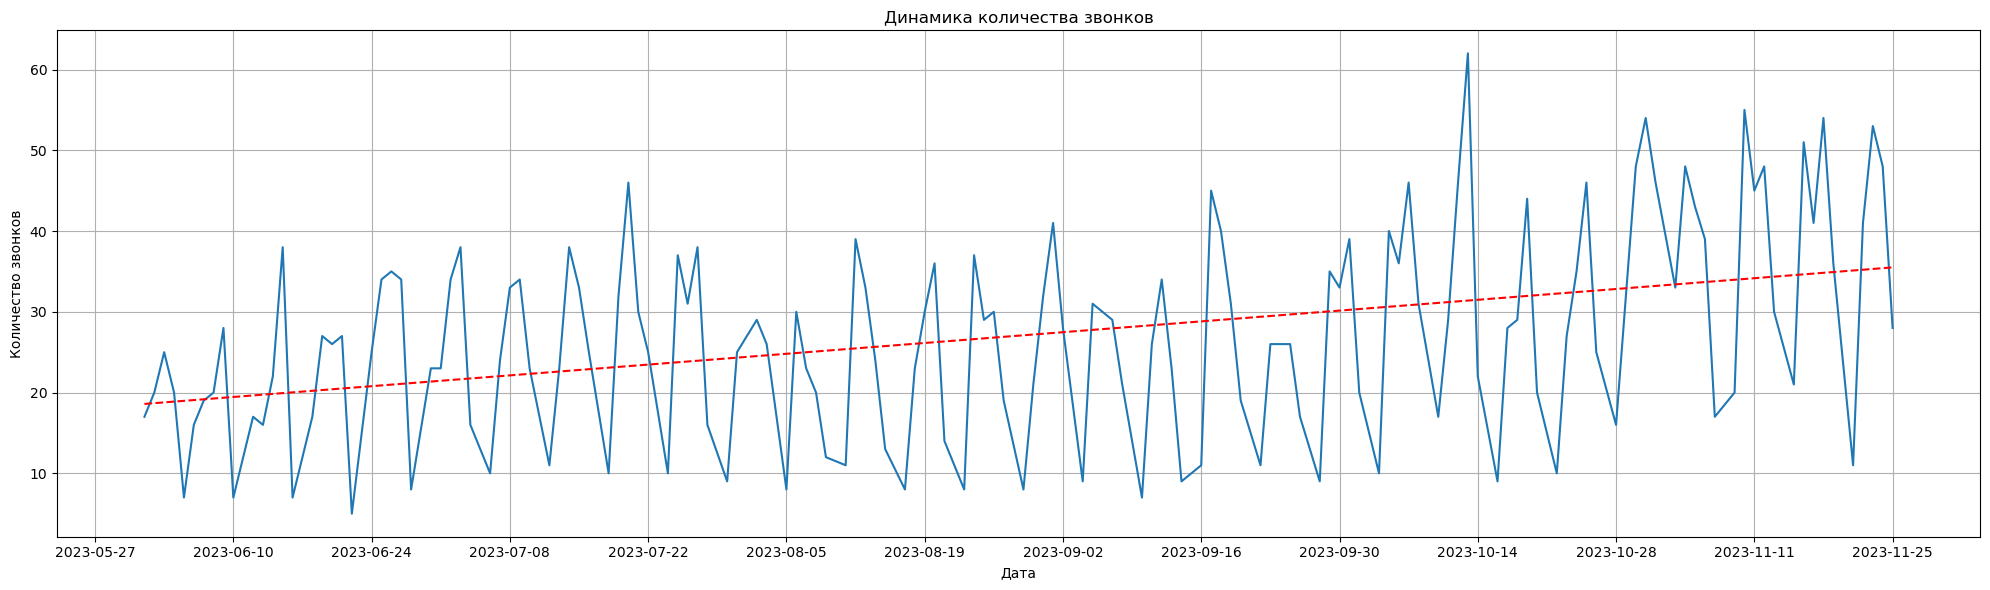

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Постройте график
plt.figure(figsize=(20, 6))
plt.plot(calls_per_day['Дата'], calls_per_day['Количество звонков'], marker=None, linestyle='-')

# Добавьте линию тренда (полином 1-й степени)
z = np.polyfit(mdates.date2num(calls_per_day['Дата']), calls_per_day['Количество звонков'], 1)
p = np.poly1d(z)
plt.plot(calls_per_day['Дата'], p(mdates.date2num(calls_per_day['Дата'])), linestyle='--', color='red', label='Линия тренда')

# Настройка осей и легенды
plt.title('Динамика количества звонков')
plt.xlabel('Дата')
plt.ylabel('Количество звонков')
plt.grid(True)

# Настройка оси X с подписями каждые 14 дней
two_weeks = mdates.DayLocator(interval=14)
plt.gca().xaxis.set_major_locator(two_weeks)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Вывод графика
plt.tight_layout()
plt.show()

In [29]:
# Создайте новый DataFrame с количеством звонков по каждому месяцу
calls_per_month = df.groupby('Месяц')['Результат звонка'].count().reset_index()

# Преобразуйте порядок месяцев в порядок календарного года
month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
calls_per_month['Месяц'] = pd.Categorical(calls_per_month['Месяц'], categories=month_order, ordered=True)
calls_per_month = calls_per_month.sort_values('Месяц')

# Переименуйте столбцы для ясности
calls_per_month.columns = ['Месяц', 'Количество звонков']

# Выведите результат
calls_per_month.head(12)

,Месяц,Количество звонков
2,Июнь,540
1,Июль,674
0,Август,590
5,Сентябрь,617
4,Октябрь,821
3,Ноябрь,808


/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


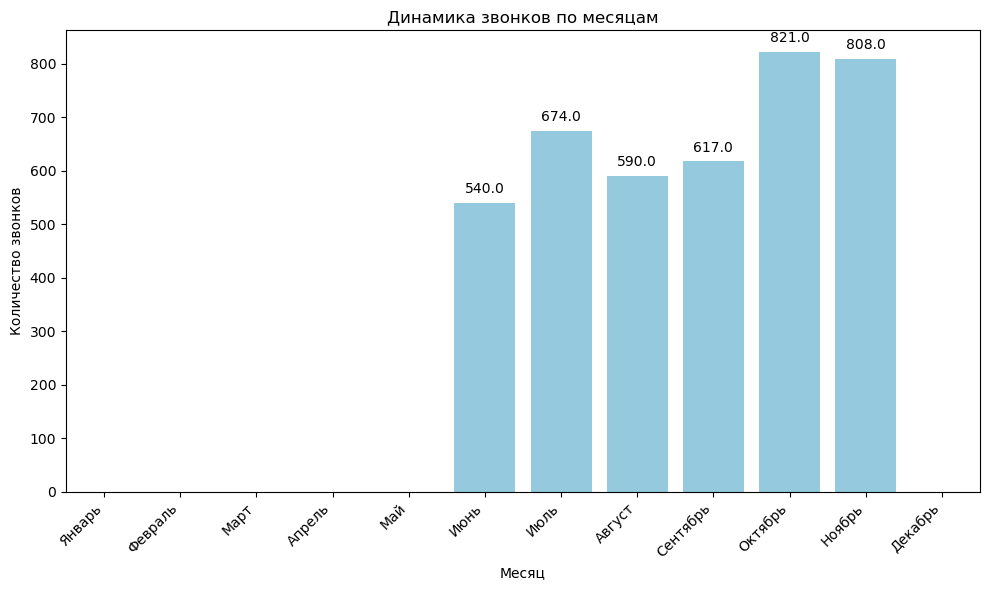

In [34]:

# Создайте новый DataFrame с количеством звонков по каждому месяцу
calls_per_month = df.groupby('Месяц')['Результат звонка'].count().reset_index()

# Преобразуйте порядок месяцев в порядок календарного года
month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
calls_per_month['Месяц'] = pd.Categorical(calls_per_month['Месяц'], categories=month_order, ordered=True)
calls_per_month = calls_per_month.sort_values('Месяц')

# Постройте столбчатую диаграмму с добавлением значений
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Месяц', y='Результат звонка', data=calls_per_month, color='skyblue')
plt.title('Динамика звонков по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество звонков')

# Добавьте значения над каждым столбиком
for p in bar_plot.patches:
    bar_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Выведите график
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd

# Создайте новый DataFrame с количеством звонков по каждой неделе
calls_per_week = df.groupby('Неделя')['Результат звонка'].count().reset_index()

# Переименуйте столбцы для ясности
calls_per_week.columns = ['Неделя', 'Количество звонков']

# Выведите результат
print(calls_per_week)


    Неделя  Количество звонков
0       22                  62
1       23                 117
2       24                 100
3       25                 127
4       26                 157
5       27                 155
6       28                 162
7       29                 168
8       30                 132
9       31                 124
10      32                 135
11      33                 131
12      34                 154
13      35                 149
14      36                 120
15      37                 110
16      38                 172
17      39                 146
18      40                 191
19      41                 207
20      42                 130
21      43                 159
22      44                 261
23      45                 219
24      46                 245
25      47                 217


/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

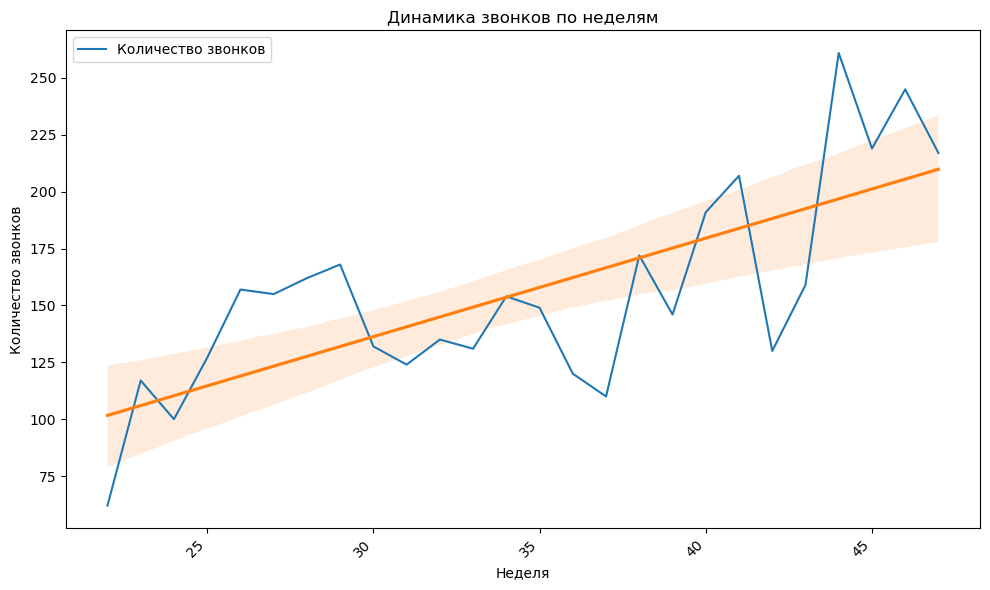

In [50]:
# Создайте новый DataFrame с количеством звонков по каждой неделе
calls_per_week = df_filtered.groupby('Неделя')['Результат звонка'].count().reset_index()

# Постройте линейный график с линией тренда
plt.figure(figsize=(10, 6))
sns.lineplot(x='Неделя', y='Результат звонка', data=calls_per_week, label='Количество звонков')

# Добавьте линию тренда
sns.regplot(x='Неделя', y='Результат звонка', data=calls_per_week, scatter=False)

# Настройте оси и легенду
plt.title('Динамика звонков по неделям')
plt.xlabel('Неделя')
plt.ylabel('Количество звонков')
plt.legend()

# Выведите график
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
